In [2]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import os
from subprocess import call
import seaborn as sns
from matplotlib import pyplot as plt

### Creare fasta file

In [2]:
fin = open('../data/external/kallisto/homo_sapiens/Homo_sapiens.GRCh38.cdna.all.fa')
flines = fin.readlines()
fin.close()

In [5]:
fout = open('../data/external/kallisto/homo_sapiens_ercc.fa', 'w')
for line in flines:
    fout.write(line)
fin = open('../data/external/ERCC92/ERCC92.fa', 'r')
flines = fin.readlines()
fin.close()
for line in flines:
    fout.write(line)
fout.close()

### Indexing

In [6]:
!kallisto index -i ../data/external/kallisto/transcripts.idx ../data/external/kallisto/homo_sapiens_ercc.fa


[build] loading fasta file ../data/external/kallisto/homo_sapiens_ercc.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 1522 target sequences
[build] warning: replaced 6 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 1131979 contigs and contains 109622116 k-mers 



### Pseudo alignment

In [4]:
fnames = os.listdir('../data/spike-in/')
sufix = '_sequence.txt.gz'
fnames = [x[:-len(sufix)-1] for x in fnames]
fnames = list(set(fnames))

In [43]:
for fname_ in fnames:
    os.mkdir('../results/ercc/' + fname_[:-1])

In [50]:
for fname_ in fnames:
    print(fname_)
    call(['kallisto', 'quant', 
          '-i', '../data/external/kallisto/transcripts.idx',
          '-o', '../results/ercc/'+fname_[:-1],
          '../data/spike-in/'+fname_+'1'+sufix, 
          '../data/spike-in/'+fname_+'2'+sufix])

JVL68_Drop_14_21s004414-1-1_Du_lane121s004414_
JVL68_Drop_9_21s004409-1-1_Du_lane121s004409_
JVL68_Drop_15_21s004415-1-1_Du_lane121s004415_
JVL68_Drop_2_21s004402-1-1_Du_lane121s004402_
JVL68_Drop_12_21s004412-1-1_Du_lane121s004412_
JVL68_Drop_11_21s004411-1-1_Du_lane121s004411_
JVL68_Drop_5_21s004405-1-1_Du_lane121s004405_
JVL68_Drop_8_21s004408-1-1_Du_lane121s004408_
JVL68_Drop_1_21s004401-1-1_Du_lane121s004401_
JVL68_Drop_10_21s004410-1-1_Du_lane121s004410_
JVL68_Drop_13_21s004413-1-1_Du_lane121s004413_
JVL68_Drop_6_21s004406-1-1_Du_lane121s004406_
JVL68_Drop_4_21s004404-1-1_Du_lane121s004404_
JVL68_Drop_3_21s004403-1-1_Du_lane121s004403_
JVL68_Drop_7_21s004407-1-1_Du_lane121s004407_


### Analysis

In [142]:
temp = pd.read_csv('../results/ercc/JVL68_Drop_10_21s004410-1-1_Du_lane121s004410/abundance.tsv', 
                   sep='\t', header=0, index_col=0)
results = pd.DataFrame(index=temp.index, columns=[x[:-1] for x in fnames])
for fname_ in fnames:
    temp = pd.read_csv('../results/ercc/%s/abundance.tsv' % fname_[:-1], sep='\t', header=0, index_col=0)
    results[fname_[:-1]] = temp['tpm'].values

In [143]:
ercc = pd.read_csv('../data/external/cms_095046.txt',
                  sep='\t', header=0, index_col=1)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


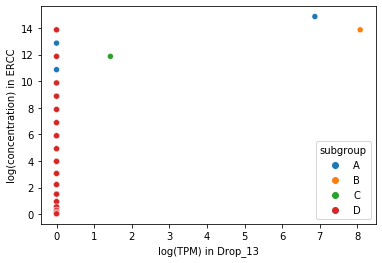

In [153]:
x=results.loc[ercc.index].iloc[:,7]
y=ercc['concentration in Mix 1 (attomoles/ul)']
sns.scatterplot(np.log2(x+1),np.log2(y+1), hue=ercc['subgroup'])
plt.xlabel('log(TPM) in Drop_13')
plt.ylabel('log(concentration) in ERCC')
plt.savefig('../figures/temp/ercc-example.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


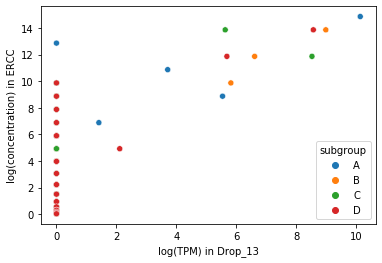

In [154]:
x=results.loc[ercc.index].sum(1)
y=ercc['concentration in Mix 1 (attomoles/ul)']
sns.scatterplot(np.log2(x+1),np.log2(y+1), hue=ercc['subgroup'])
plt.xlabel('log(TPM) in Drop_13')
plt.ylabel('log(concentration) in ERCC')
plt.savefig('../figures/temp/ercc-sum.pdf')